# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [1]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import matplotlib.pyplot as plt
import json

file = open('yearinfo.json')
yearinfo = json.load(file)


In [2]:
yearinfo.keys() # to check different keys or range of years

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [3]:
yearinfo.values() #checking the values

dict_values([[{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am'

In [4]:
len(yearinfo['2010']) #finding the number of songs every year

100

In [5]:
yearinfo['2010'][0].keys() # column names

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [6]:
yearinfo['2010'][0].values() # to check the format of the value

dict_values([['Kesha'], ['/wiki/Tik_Tok_(song)'], ['Tik Tok (song)'], 1, '"Tik Tok"', ['/wiki/Kesha']])

In [7]:
column_names = list(yearinfo['2010'][0].keys())+(['Year']) # to create column for the dataframe
column_names 

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'Year']

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

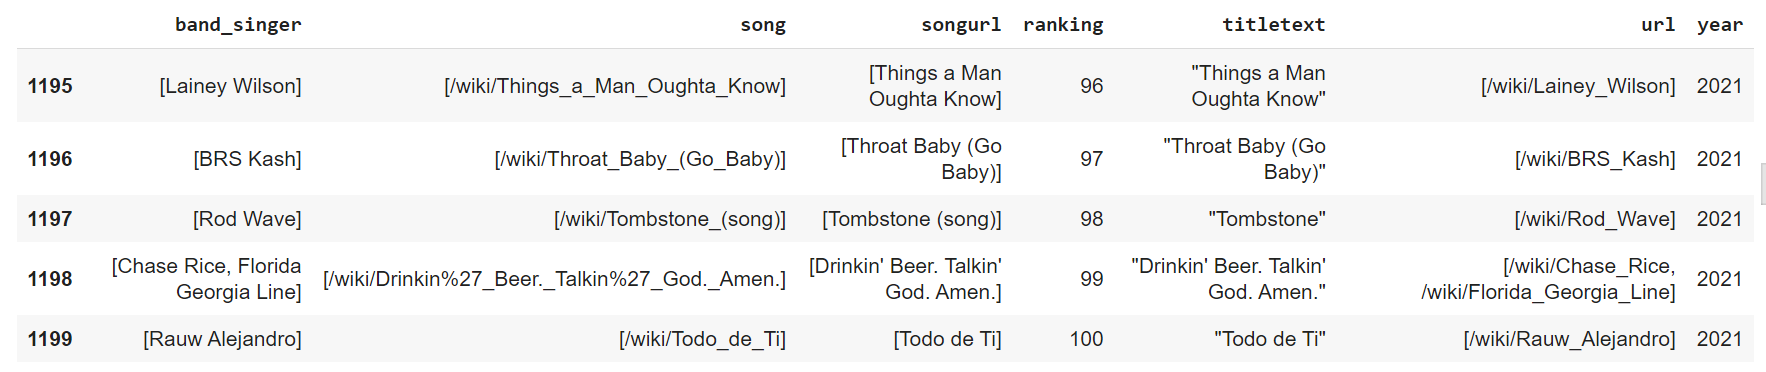

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [8]:
#write your code here
yearinfo_list = [] # Appending all the data in the yearinfo_list
for key, value in yearinfo.items():
    for i in value:
        var = list(i.values())+[key]
        yearinfo_list.append(var) 

In [9]:
df = pd.DataFrame(yearinfo_list,columns = column_names) # Creating dataframe
df.tail() #tail() displays the last 5 data

band_singer  \
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                  songurl  ranking  \
1195           [Things a Man Oughta Know]       96   
1196              [Throat Baby (Go Baby)]       97   
1197                   [Tombstone (song)]       98   
1198  [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                         [Todo de Ti]      100   

                                titletext  \
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  Year  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021

In [10]:
df.band_singer[0] # getting the data

['Kesha']

In [11]:
df.dtypes # checking the datatype

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
Year           object
dtype: object

In [12]:
def Get_exact_name(column):# () that will get the exact name or get it in the proper format
    value = column[0]
    return value

#column that are needed to be in proper format
df['band_singer'] = df.band_singer.map(Get_exact_name)
df['song'] = df.song.map(Get_exact_name)
df['songurl'] = df.songurl.map(Get_exact_name)
df['url'] = df.url.map(Get_exact_name)

df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  Year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [13]:
#Write your program and plot bar graph
# getting the top 20 singer
df.value_counts(subset=['band_singer'])[:20]

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
Katy Perry          14
Chris Brown         14
Justin Bieber       14
Post Malone         13
Ed Sheeran          13
Imagine Dragons     12
Shawn Mendes        11
Bruno Mars          11
Adele               11
Lady Gaga           11
Cardi B             10
Usher (musician)    10
Calvin Harris       10
Jason Derulo        10
dtype: int64

**Question: Who is the most prolific singer?**


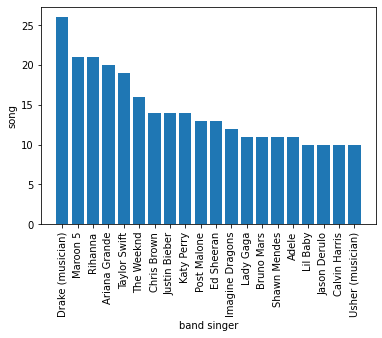

In [14]:
#ploting graph to check who is the most prolific singer
y = df.band_singer.value_counts()[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('band singer')
plt.ylabel('song')
plt.show()

### Drake is the most prolific singer because he has appeared in 26 different songs whcih is the highest.

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [15]:
#write your code here
df['score'] = [101-i for i in df['ranking']]# adding the score column to the dataframe
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  Year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [16]:
df.dtypes # checking data types

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
Year           object
score           int64
dtype: object

In [42]:
# creating a dictionary to store the name and score of the singer
singer_score = {}
# also converting singer_score to series
for singer, songs in df.groupby('band_singer'):
    singer_score[singer] = songs.score.sum()
singer_score    

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


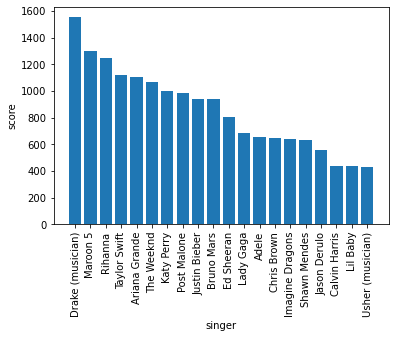

In [43]:
#ploting graph
y = pd.Series(data = singer_score, index =  y.keys())[:20].sort_values(ascending = False)
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

#### The top 3 singer has no change in their position but after the 3rd position most of the singers have been shifted to other position. This happened because before we used the number of the singer appeared in different song to plot the graph and after changing the metric, we have used  the score of the singer to plot the graph.

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

#### Which song got highest score in each year ? 

In [46]:
#write your solution from here
df['song'] # getting the song names

0                              Tik_Tok_(song)
1         Need_You_Now_(Lady_Antebellum_song)
2                            Hey,_Soul_Sister
3                            California_Gurls
4                            OMG_(Usher_song)
                        ...                  
1195                 Things_a_Man_Oughta_Know
1196                    Throat_Baby_(Go_Baby)
1197                         Tombstone_(song)
1198    Drinkin%27_Beer._Talkin%27_God._Amen.
1199                               Todo_de_Ti
Name: song, Length: 1200, dtype: object

In [47]:
df['song'][0].split('/')[-1] # Trying to get the actual name of the song using split()

'Tik_Tok_(song)'

In [48]:
def get_song(song): #get_song() for getting the exact name for the song.
    name = song.split("/")[-1] 
    return name
df['song'] = df.song.map(get_song)
df.song[0:5]

0                         Tik_Tok_(song)
1    Need_You_Now_(Lady_Antebellum_song)
2                       Hey,_Soul_Sister
3                       California_Gurls
4                       OMG_(Usher_song)
Name: song, dtype: object

In [49]:
for key, value in df.groupby('Year'): # It is beaing group by the year and checks the highest score
    highest_score = value[value.score == value.score.max()]
    print(highest_score.song, highest_score.Year , highest_score.score) 

0    Tik_Tok_(song)
Name: song, dtype: object 0    2010
Name: Year, dtype: object 0    100
Name: score, dtype: int64
100    Rolling_in_the_Deep
Name: song, dtype: object 100    2011
Name: Year, dtype: object 100    100
Name: score, dtype: int64
200    Somebody_That_I_Used_to_Know
Name: song, dtype: object 200    2012
Name: Year, dtype: object 200    100
Name: score, dtype: int64
300    Thrift_Shop
Name: song, dtype: object 300    2013
Name: Year, dtype: object 300    100
Name: score, dtype: int64
400    Happy_(Pharrell_Williams_song)
Name: song, dtype: object 400    2014
Name: Year, dtype: object 400    100
Name: score, dtype: int64
500    Uptown_Funk
Name: song, dtype: object 500    2015
Name: Year, dtype: object 500    100
Name: score, dtype: int64
600    Love_Yourself
Name: song, dtype: object 600    2016
Name: Year, dtype: object 600    100
Name: score, dtype: int64
700    Shape_of_You
Name: song, dtype: object 700    2017
Name: Year, dtype: object 700    100
Name: score, dtype: in

## SUBMISSION DATE: 2nd April 2022 